In [1]:
import matplotlib.pyplot as plt
import joblib
import numpy as np
import pandas as pd

In [2]:
with open('/Users/alexanderhsu/Google Drive/My Drive/MABe_Competition/data/ALL_train_data.sav', 'rb') as fr:
    data_train = joblib.load(fr)

/opt/anaconda3/envs/asoid/lib/python3.9/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator StandardScaler from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
with open('/Users/alexanderhsu/Google Drive/My Drive/MABe_Competition/data/active_learning_fixed_wpredictions.sav', 'rb') as fr:
    [X_train_list, Y_train_list, predictions_list,
     iterX_f1_scores_list, iterX_macro_scores_list, iterX_predict_prob_list,
     sampled_idx_list] = joblib.load(fr)

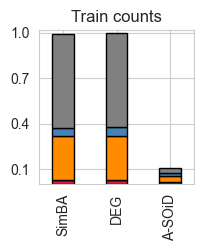

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.set_title('Train counts')
train_cnts_df = pd.DataFrame({'SimBA':
                                  [int(len(np.where(data_train[4]==j)[0])*0.99) for j in np.unique(data_train[4])],
                              'DEG':
                                  [len(np.where(data_train[4]==j)[0]) for j in np.unique(data_train[4])],
                              'A-SOiD':
                                  np.mean([np.hstack([len(np.where(Y_train_list[-1][j]==k)[0])
                                                      for k in np.unique(Y_train_list[-1][j])])
                                           for j in range(len(Y_train_list[-1]))], axis=0)},
                             index=['attack', 'investigation', 'mount', 'other'])
train_cnts_df.T.plot(kind='bar',
                     stacked=True,
                     edgecolor='k',
                     width=0.4,
                     color=['crimson', 'darkorange', 'steelblue', 'grey'],
                     legend=False,
                     ax=ax)
ax.set_yticks(np.arange(4227.5, 42275.1, 12682.5))
ax.set_yticklabels(np.round(np.arange(0.1, 1.01, 0.3), 2))
ax.set_ylim([0, 43000])
plt.show()

fig.savefig('/Users/alexanderhsu/Google Drive/My Drive/manuscript_figures/asoid/additional/train_counts_bar.svg')